In [47]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [62]:
# Read the file named "pci_thesis_cleaned.csv" into a Pandas dataframe

# Drop S.N and save to new csv file


df = pd.read_csv('24-pci-final.csv')
df.drop(['S.N'],axis=1,inplace=True)

# df.drop(159,axis=0,inplace=True)

df.replace({'.0.16': 0.16, '0..66': 0.66, '..45': 0.45},inplace=True)

df.dropna(axis=0, inplace=True)
# df.drop(df[df['AC3'] == '#VALUE!'].index[0], axis= 0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')


df.to_csv('24-pci-final-cleaned.csv',index=False)
# Load the data set
df = pd.read_csv('24-pci-final-cleaned.csv')

any nan = False
all finite = True


In [63]:
# Take a quick look at the dataset
df.head()

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,...,F1,F2,F3,G1,G2,G3,H1,H2,H3,PCI
0,0.000,1.450,0.000,0.000,0.000,0.000,0.000,2.350,0.000,0.000,...,0.000,0.000,0.400,0.000,0.000,0.000,0.000,0.000,1.550,36.000
1,0.000,1.470,0.000,0.000,0.000,0.000,0.000,0.120,0.000,0.000,...,0.000,0.000,0.090,0.000,0.000,0.000,2.220,0.000,1.250,56.000
2,0.000,0.800,0.000,0.750,2.910,0.000,0.000,0.130,0.000,0.740,...,0.000,0.000,0.340,0.000,0.000,0.260,0.000,0.000,0.330,46.000
3,0.000,7.650,0.000,0.000,0.000,0.000,0.000,4.320,2.990,0.000,...,0.000,0.250,0.000,0.000,0.000,0.000,0.000,2.970,0.000,45.000
4,0.000,0.100,0.000,0.000,0.000,0.000,0.000,1.230,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.320,0.000,87.000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      503 non-null    float64
 1   A2      503 non-null    float64
 2   A3      503 non-null    float64
 3   B1      503 non-null    float64
 4   B2      503 non-null    float64
 5   B3      503 non-null    float64
 6   C1      503 non-null    float64
 7   C2      503 non-null    float64
 8   C3      503 non-null    float64
 9   D1      503 non-null    float64
 10  D2      503 non-null    float64
 11  D3      503 non-null    float64
 12  E1      503 non-null    float64
 13  E2      503 non-null    float64
 14  E3      503 non-null    float64
 15  F1      503 non-null    float64
 16  F2      503 non-null    float64
 17  F3      503 non-null    float64
 18  G1      503 non-null    float64
 19  G2      503 non-null    float64
 20  G3      503 non-null    float64
 21  H1      503 non-null    float64
 22  H2

In [65]:
df.describe()

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,...,F1,F2,F3,G1,G2,G3,H1,H2,H3,PCI
count,503.000,503.000,503.000,503.000,503.000,503.000,503.000,503.000,503.000,503.000,...,503.000,503.000,503.000,503.000,503.000,503.000,503.000,503.000,503.000,503.000
mean,0.091,0.235,0.161,0.085,0.234,0.199,0.301,0.432,0.462,0.161,...,0.038,0.026,0.029,0.036,0.060,0.079,0.059,0.145,0.087,59.334
std,0.287,0.560,0.358,0.283,0.498,0.503,0.441,0.590,0.828,0.288,...,0.158,0.085,0.102,0.130,0.174,0.210,0.218,0.453,0.289,20.260
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,46.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.110,0.230,0.160,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,60.000
75%,0.000,0.236,0.150,0.000,0.230,0.134,0.510,0.600,0.628,0.225,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,74.000
max,2.500,7.650,2.480,2.300,4.320,4.560,3.010,4.320,12.500,1.910,...,2.100,0.900,1.200,1.200,1.620,2.000,2.400,3.200,3.080,100.000


#### Creation of Linear Regression Objects

In [66]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['PCI'],axis=1)

# Choose the response variable 'y' 
y = df.PCI



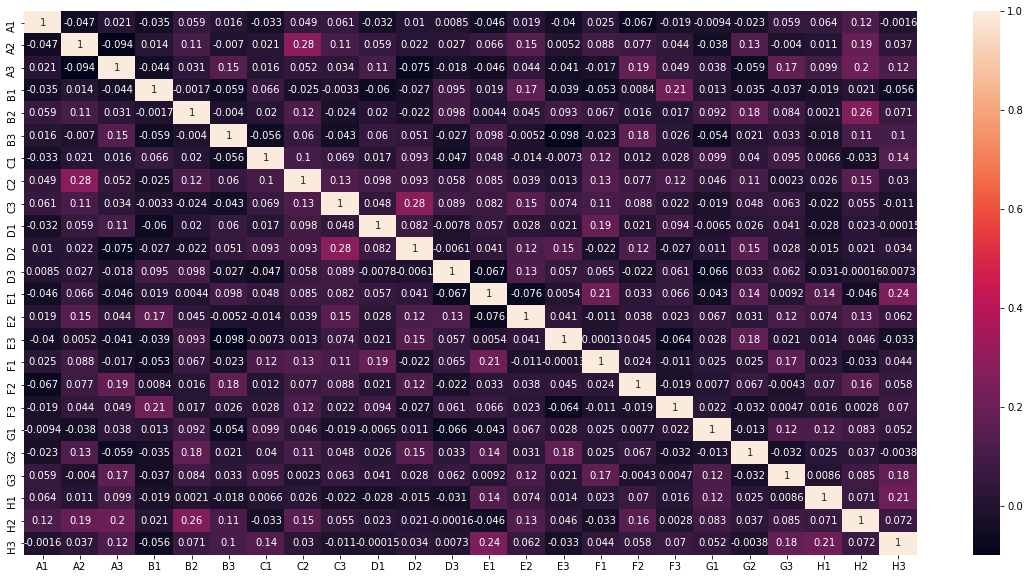

In [67]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = X.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

In [68]:

# sns.pairplot(X)


In [69]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [70]:
# r2 = []
# start = 0
# for rs in range(0,100):
    

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=33)



# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X_train,y_train)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
# print(multi_coef)
print(f"test_r2 = {multi_linear.score(X_test,y_test)}")
print(f"train_r2 = {multi_linear.score(X_train,y_train)}")

# r2.append(multi_linear.score(X_test,y_test))

# for i,r in enumerate(r2):
#     if r>0.59 and r< 0.67:
#         print(f"{i+start}: {r}")

# old
# test_r2 = 0.6006721576748102
# train_r2 = 0.6114327988775574

test_r2 = 0.6035602753503293
train_r2 = 0.6218346970779149


#### Printing the individual $\beta$ values

In [71]:
print(f"Coefficients: {multi_coef}")
print(f"Intercept: {multi_linear.intercept_}")

Coefficients: [ -3.45764899  -2.38771929 -10.91204593   4.84508807  -1.97045812
  -0.6976973   -4.27814507  -1.04608083  -3.24715289  -3.20629938
  -1.20087235 -13.43440861   0.81030377  -2.28083168  -5.24004017
 -22.33951374 -67.65805478 -84.86958952  -6.73772782  -2.95721085
  -6.28969056   2.71228629  -1.11023022  -9.71971223]
Intercept: 77.40372637718372


line: y = 0.6530045836870146 * x + 20.171918157838753


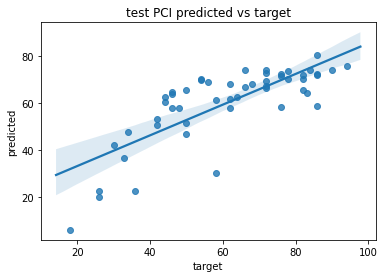

In [72]:

x_test_prediction = multi_linear.predict(X_test)
ax = sns.regplot(x=y_test, y=x_test_prediction)
ax.set(title = 'test PCI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

line: y = 0.6218346970779142 * x + 22.354421966316824


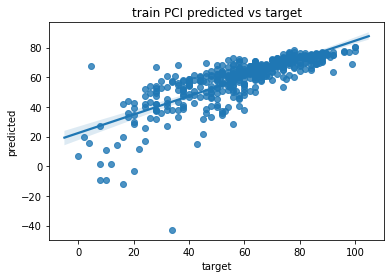

In [73]:
x_train_prediction = multi_linear.predict(X_train)
# x_train_prediction.index[x_train_prediction<0]
# less_than_zero_indices = np.where(x_train_prediction<0)[0]
# x_train_prediction = np.delete(x_train_prediction, less_than_zero_indices)
# y_train_new = y_train.drop(less_than_zero_indices, axis=0)

ax = sns.regplot(x=y_train, y= x_train_prediction)
ax.set(title = 'train PCI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")


In [74]:
# Now using the stat

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=33)

# Assuming you have your data stored in X and y
# X should be a 2-dimensional array (or DataFrame) containing your features
# y should be a 1-dimensional array (or Series) containing your target

# Fit the linear regression model using sklearn
# sklearn_model = LinearRegression()
# sklearn_model.fit(X, y)

# Add a constant term to the features (intercept) for statsmodels
X_train_with_constant = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
statsmodel = sm.OLS(y_train, X_train_with_constant)
results = statsmodel.fit()

# Access the p-values for each coefficient
p_values = results.pvalues
pd.options.display.float_format = '{:.3f}'.format
greater_than_01 = p_values[p_values.index[p_values > 0.1]]
print(p_values)
print("\n\n p_values greater than 0.01")
print(greater_than_01)
count = greater_than_01.count()
print(count)
# filtered = filter(lambda x: x > 0.1 , p_values)
# print((pd.Series(filtered)))
# print(p_values)

results.summary()

const   0.000
A1      0.099
A2      0.044
A3      0.000
B1      0.032
B2      0.129
B3      0.587
C1      0.003
C2      0.351
C3      0.000
D1      0.165
D2      0.486
D3      0.000
E1      0.786
E2      0.143
E3      0.000
F1      0.000
F2      0.000
F3      0.000
G1      0.160
G2      0.425
G3      0.044
H1      0.342
H2      0.454
H3      0.000
dtype: float64


 p_values greater than 0.01
B2   0.129
B3   0.587
C2   0.351
D1   0.165
D2   0.486
E1   0.786
E2   0.143
G1   0.160
G2   0.425
H1   0.342
H2   0.454
dtype: float64
11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PCI   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     29.26
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           5.41e-75
Time:                        09:35:53   Log-Likelihood:                -1783.4
No. Observations:                 452   AIC:                             3617.
Df Residuals:                     427   BIC:                             3720.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.4037      1.194     64.836      0.000      75.057      79.750
A1            -3.4576      2.094     -1.651      0.099      -7.573       0.658
A2            -2.3877      1.180     -2.024      0.044      -4.707      -0.069
A3           -10.9120      1.867     -5.845      0.000     -14.582      -7.242
B1             4.8451      2.256      2.147      0.032       0.410       9.280
B2            -1.9705      1.295     -1.522      0.129      -4.516       0.575
B3            -0.6977      1.283     -0.544      0.587      -3.219       1.824
C1            -4.2781      1.435     -2.982      0.003      -7.098      -1.458
C2            -1.0461      1.121     -0.933      0.351      -3.249       1.157
C3            -3.2472      0.766     -4.240      0.000      -4.753      -1.742
D1            -3.2063      2.305     -1.391      0.165      -7.737       1.325
D2            -1.2009      1.722     -0.697      0.486      -4.585       2.183
D3           -13.4344      1.744     -7.701      0.000     -16.863     -10.006
E1             0.8103      2.982      0.272      0.786      -5.051       6.672
E2            -2.2808      1.556     -1.466      0.143      -5.339       0.778
E3            -5.2400      1.330     -3.940      0.000      -7.854      -2.626
F1           -22.3395      3.997     -5.589      0.000     -30.195     -14.484
F2           -67.6581      8.305     -8.147      0.000     -83.981     -51.335
F3           -84.8696      6.005    -14.133      0.000     -96.673     -73.066
G1            -6.7377      4.788     -1.407      0.160     -16.149       2.674
G2            -2.9572      3.701     -0.799      0.425     -10.232       4.318
G3            -6.2897      3.110     -2.022      0.044     -12.402      -0.177
H1             2.7123      2.851      0.951      0.342      -2.892       8.316
H2            -1.1102      1.482     -0.749      0.454      -4.023       1.802
H3            -9.7197      2.674     -3.635      0.000     -14.975      -4.464
==============================================================================
Omnibus:                       45.450   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.934
Skew:                           0.015   Prob(JB):                     1.79e-58
Kurtosis:                       6.758   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:

# # Initialize a list to store the beta values for each linear regression model
# linear_coef = []
# linear_score = []

# # Loop over all the predictors
# # In each loop "i" holds the name of the predictor 
# for i in X_train:
    
#     # Set the current predictor as the variable x_train
#     x_train = X_train[[i]]

#     # Create a linear regression object
#     linreg = LinearRegression()

#     # Fit the model with training data 
#     # Remember to choose only one column at a time i.e. given by x_train (not X_train)
#     linreg.fit(x_train,y_train)
    
#     # Add the coefficient value of the model to the list
#     linear_coef.append(linreg.coef_)
#     linear_score.append(linreg.score(X_test[[i]], y_test))
    
# linear_coef
# linear_score
